# Diabetes Prediction

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

In [2]:
#Loading Dataset
df = pd.read_csv("kaggle_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


# Dataset Exploration

In [3]:
# Total number of rows and columns
df.shape

(2000, 9)

In [4]:
# Returns all column names 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Returns basic information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [7]:
# Shows statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
# Returns number of null values for all  columns
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
#Renaming a column
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
# Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

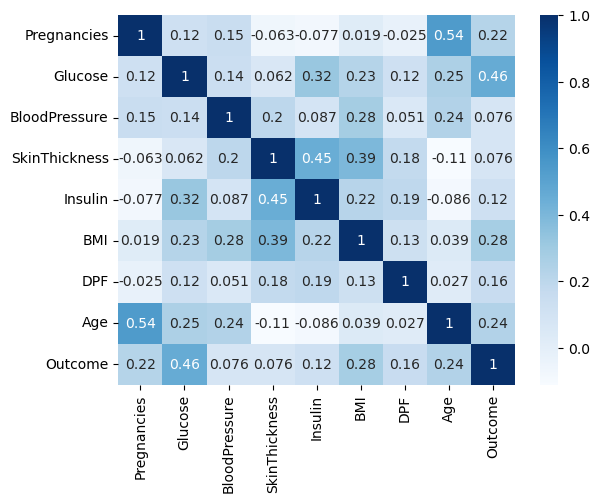

In [11]:
#Correlation
sns.heatmap(df.corr(),annot=True,cmap='Blues')

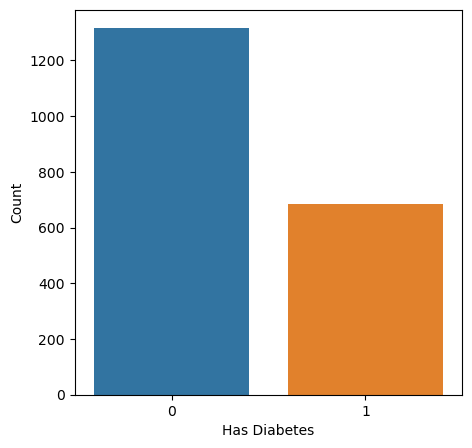

In [12]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome', data=df)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

# Data Cleaning

<AxesSubplot:>

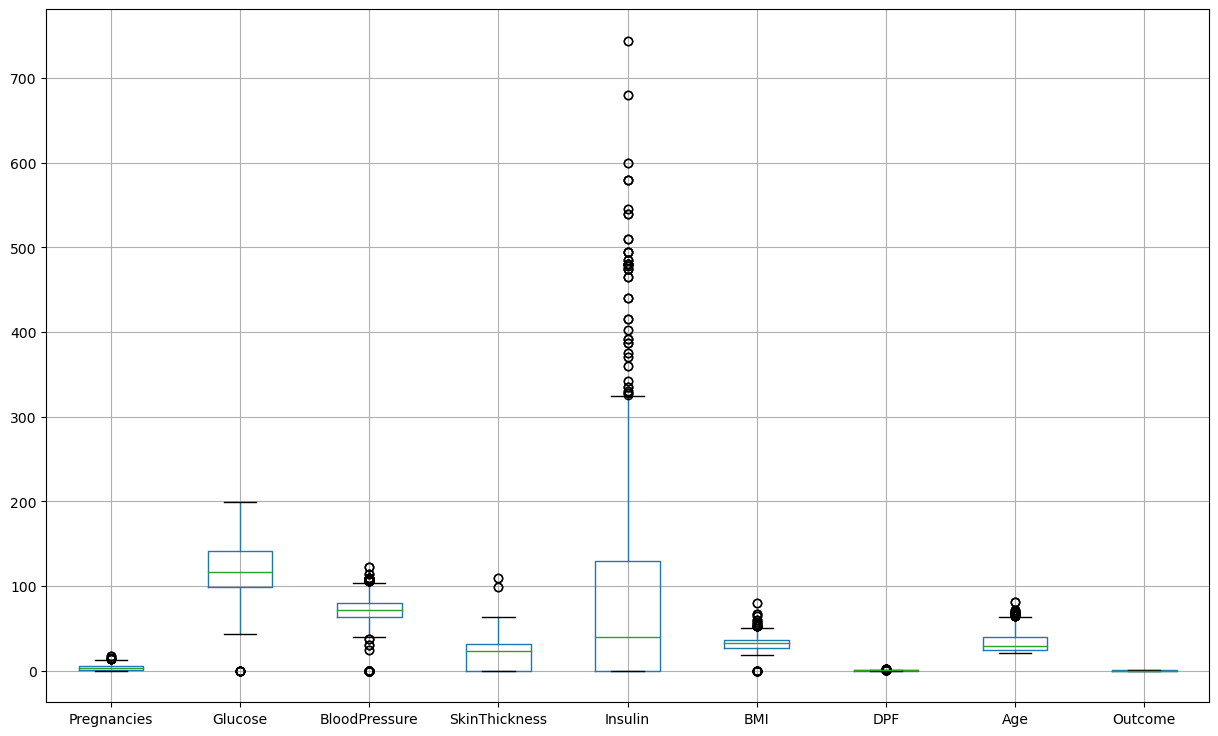

In [13]:
#Boxplot for outliers
plt.figure(figsize=(15,9))
df.boxplot()

In [14]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

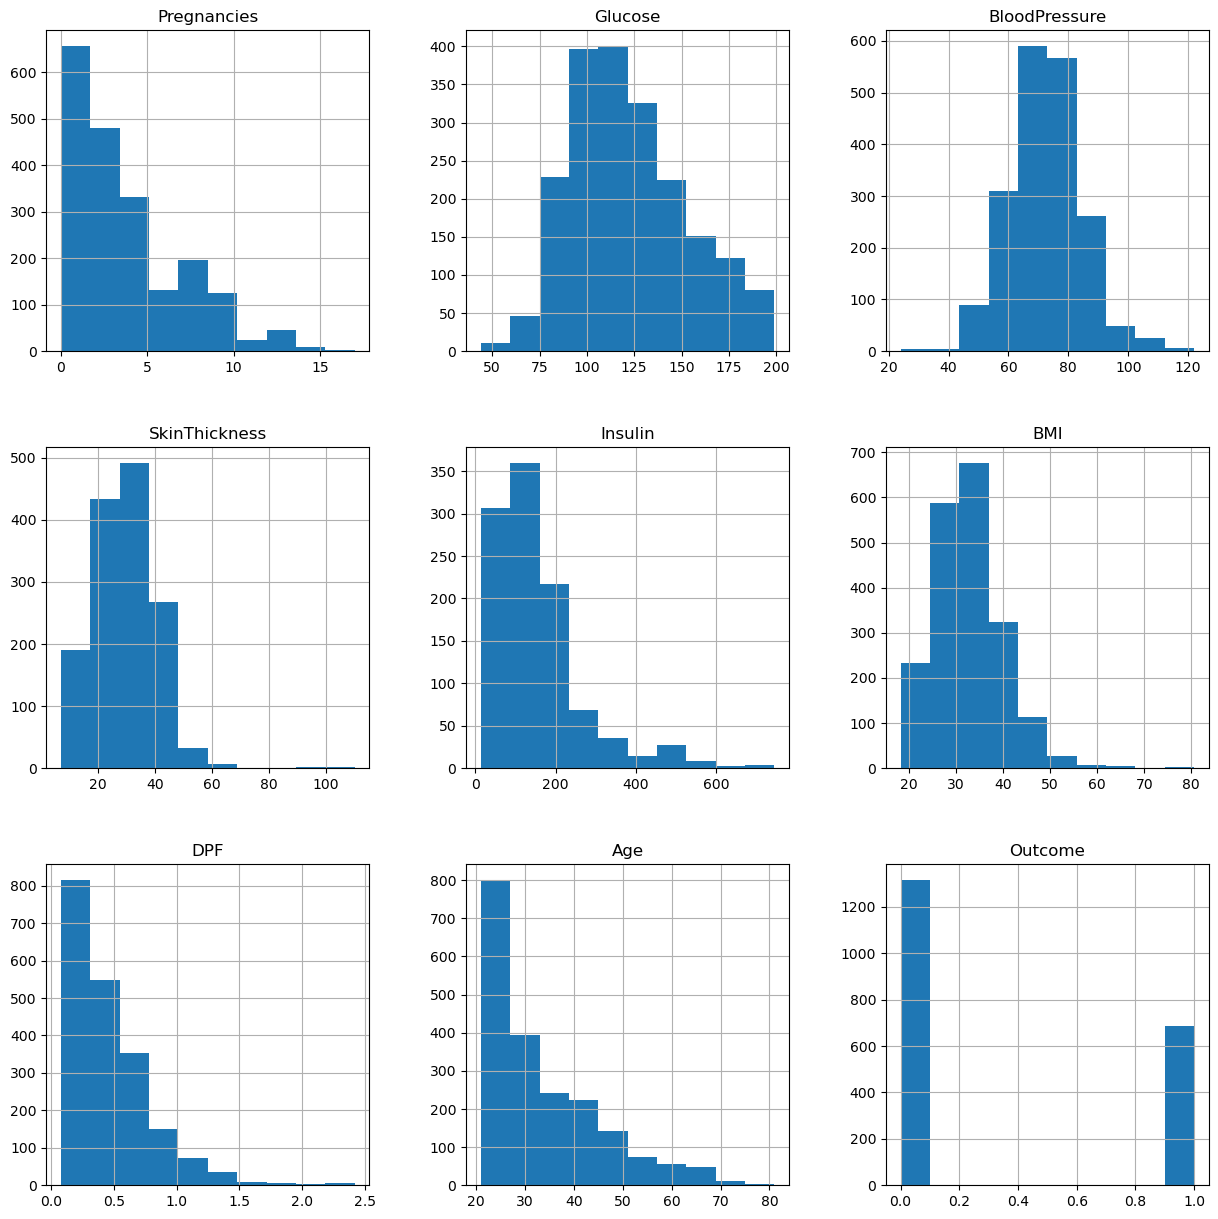

In [15]:
#To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
h = df_copy.hist(figsize = (15,15))

In [16]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [17]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [18]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.703500,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.975340,30.533114,44.000,99.000,118.000,141.000,199.00
BloodPressure,2000.0,72.403665,11.949531,24.000,64.000,72.000,80.000,122.00
SkinThickness,2000.0,29.243500,9.124957,7.000,25.000,29.000,32.000,110.00
Insulin,2000.0,140.482000,81.562840,14.000,120.000,126.000,130.000,744.00
BMI,2000.0,32.646600,7.190196,18.200,27.600,32.400,36.800,80.60
DPF,2000.0,0.470930,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.090500,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.342000,0.474498,0.000,0.000,0.000,1.000,1.00


# Splitting Dataset

In [19]:
X = df_copy.drop(['Outcome'],axis=1)
y = df_copy['Outcome']

# Feature Scaling

In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
sc_X = sc.transform(X)

# Model Building

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = df_copy.drop(['Outcome'],axis=1)
y = df_copy['Outcome']

X_train, X_test, y_train, y_test = train_test_split(sc_X, y, test_size=0.20, random_state=0)

### Model selection and checking cross val score

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [23]:
classifiers={'LogisticRegression':LogisticRegression(),
             'DecisionTreeClassifier':DecisionTreeClassifier(),
             'RandomForestClassifier':RandomForestClassifier(),
             'GradientBoostingClassifier':GradientBoostingClassifier(),
             'KNeighborsClassifier':KNeighborsClassifier(),
             'SVC':SVC(),
             'AdaBoostClassifier':AdaBoostClassifier()}

for key,classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier : ", classifier.__class__.__name__, "Has a cross_val_score of", round(training_score.mean(), 2) * 100, "%")

Classifier :  LogisticRegression Has a cross_val_score of 77.0 %
Classifier :  DecisionTreeClassifier Has a cross_val_score of 94.0 %
Classifier :  RandomForestClassifier Has a cross_val_score of 96.0 %
Classifier :  GradientBoostingClassifier Has a cross_val_score of 87.0 %
Classifier :  KNeighborsClassifier Has a cross_val_score of 79.0 %
Classifier :  SVC Has a cross_val_score of 82.0 %
Classifier :  AdaBoostClassifier Has a cross_val_score of 81.0 %


### Hyperparameter tuning of above models using GridsearchCV

In [24]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_p = {"penalty": ['l1', 'l2']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_p)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# SVC
svc_p={'C':[0.5,0.4,0.3,0.2,0.1,1.0]}
grid_svc_p=GridSearchCV(SVC(),svc_p)
grid_svc_p.fit(X_train,y_train)
svc=grid_svc_p.best_estimator_

# KNN
knears_p = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_p)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# DecisionTree Classifier
tree_p = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_p)
grid_tree.fit(X_train, y_train)
decision_tree_c = grid_tree.best_estimator_

# RandomForestClassifier
Rforest_p={'n_estimators':list(range(100,200,300)),'criterion':['gini', 'entropy', 'log_loss'],"min_samples_leaf": list(range(1,3,5)),
           "max_depth": list(range(1,9,3))}
grid_Rforest=GridSearchCV(RandomForestClassifier(),Rforest_p)
grid_Rforest.fit(X_train, y_train)
Randomforest=grid_Rforest.best_estimator_

# GradientBoostingClassifier
Gboosting_p={'max_depth' : [3,5,None], 'max_features' : [1,3], 'min_samples_leaf' : [1,2], 'min_samples_split' : [1,2,3]}
grid_Gboosting=GridSearchCV(GradientBoostingClassifier(),Gboosting_p)
grid_Gboosting.fit(X_train,y_train)
Gboost=grid_Gboosting.best_estimator_

# AdaBoostClassifier
Aboosting_p={'n_estimators':list(range(100,300,400))}
grid_Aboosting=GridSearchCV(AdaBoostClassifier(),Aboosting_p)
grid_Aboosting.fit(X_train,y_train)
Aboost=grid_Aboosting.best_estimator_


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr

In [25]:
Gboost

GradientBoostingClassifier(max_depth=None, max_features=1, min_samples_leaf=2,
                           min_samples_split=3)

### Cross val score fine tuned model

In [26]:
gridsearch_classifiers={'log_reg':log_reg,'svc':svc,'knears_neighbors':knears_neighbors,'decision_tree_c':decision_tree_c,'Randomforest':Randomforest,'Gboost':Gboost,'Aboost':Aboost}
for key, classifier in gridsearch_classifiers.items():
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ","Fine Tuned",classifier.__class__.__name__, "Has a cross_val_score of", round(training_score.mean() * 100, 2).astype(str) + "%")

Classifiers:  Fine Tuned LogisticRegression Has a cross_val_score of 77.12%
Classifiers:  Fine Tuned SVC Has a cross_val_score of 82.06%
Classifiers:  Fine Tuned KNeighborsClassifier Has a cross_val_score of 87.56%
Classifiers:  Fine Tuned DecisionTreeClassifier Has a cross_val_score of 76.25%
Classifiers:  Fine Tuned RandomForestClassifier Has a cross_val_score of 87.13%
Classifiers:  Fine Tuned GradientBoostingClassifier Has a cross_val_score of 94.94%
Classifiers:  Fine Tuned AdaBoostClassifier Has a cross_val_score of 82.88%


### Accuracy of fine tuned model

In [27]:
from sklearn.metrics import accuracy_score
for key, classifier in gridsearch_classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_test)
    print("Classifier : ", "Fine Tuned",classifier.__class__.__name__, "Has an accuracy score of", round(accuracy_score(y_test,y_pred)*100,2), "%")

Classifier :  Fine Tuned LogisticRegression Has an accuracy score of 78.75 %
Classifier :  Fine Tuned SVC Has an accuracy score of 84.5 %
Classifier :  Fine Tuned KNeighborsClassifier Has an accuracy score of 90.75 %
Classifier :  Fine Tuned DecisionTreeClassifier Has an accuracy score of 76.5 %
Classifier :  Fine Tuned RandomForestClassifier Has an accuracy score of 89.25 %
Classifier :  Fine Tuned GradientBoostingClassifier Has an accuracy score of 99.5 %
Classifier :  Fine Tuned AdaBoostClassifier Has an accuracy score of 82.75 %


# Model Evaluation

In [28]:
tuned_GB = GradientBoostingClassifier(max_depth=None, max_features=1, min_samples_leaf=2,min_samples_split=3)
tuned_GB.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=None, max_features=1, min_samples_leaf=2,
                           min_samples_split=3)

In [29]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred = tuned_GB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

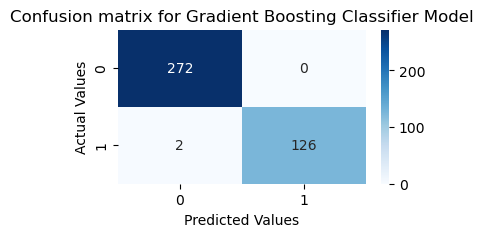

In [30]:
# Plotting the confusion matrix
plt.figure(figsize=(4,2))
p = sns.heatmap(cm, annot=True, cmap="Blues",fmt='g')
plt.title('Confusion matrix for Gradient Boosting Classifier Model')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [31]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy is : {}%".format(score))

Accuracy is : 99.5%


In [32]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



### ROC Curve

log_reg 72.17
svc 78.23
knears_neighbors 83.58
decision_tree_c 71.67
Randomforest 85.19
Gboost 93.72
Aboost 80.45


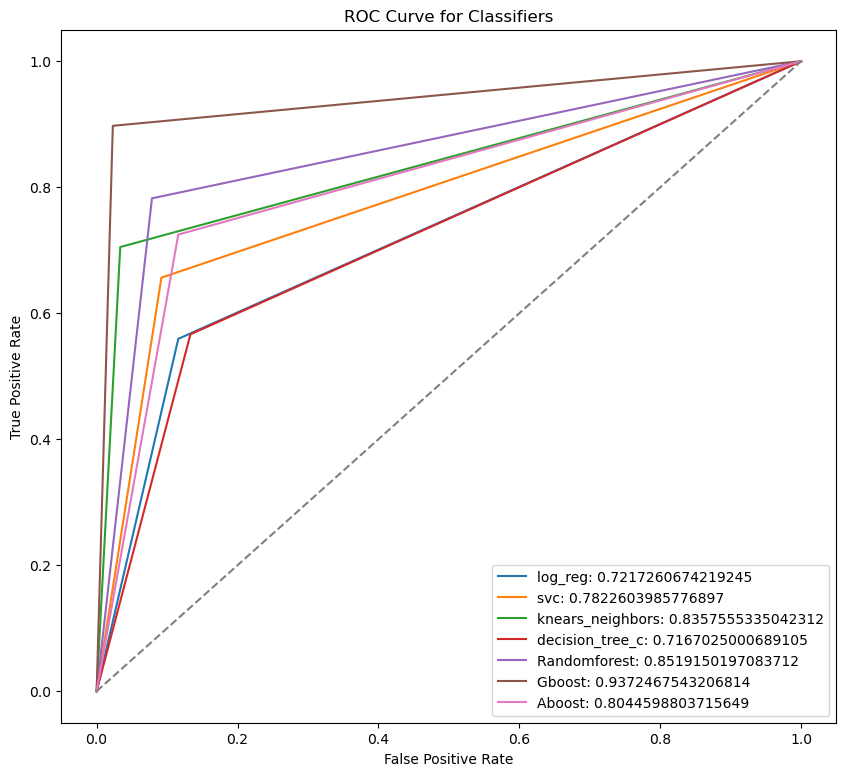

In [33]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

cross_val_preds = {}

for key, classifier in gridsearch_classifiers.items():
    cross_val_preds[key] = cross_val_predict(classifier, X_train, y_train, cv=5)
    
plt.figure(figsize=(10, 9))

for key, predictions in cross_val_preds.items():
    roc_auc_s = roc_auc_score(y_train, predictions)
    fpr, tpr, _ = roc_curve(y_train, predictions)
    print(key, round(roc_auc_s*100,2))
    plt.plot(fpr, tpr, label=key + ': ' + str(roc_auc_s))
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend()
plt.show()

# Predictions

In [34]:
# Creating a function for prediction
def diabetes_prediction(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    Preg = int(Pregnancies)
    Gl = float(Glucose)
    BP = float(BloodPressure)
    ST = float(SkinThickness)
    In = float(Insulin)
    Bmi = float(BMI)
    Dpf = float(DPF)
    age = int(Age)

    x_p = [[Preg, Gl, BP, ST, In, Bmi, Dpf, age]]
    x_p = sc.transform(x_p)

    return tuned_GB.predict(x_p)

In [35]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = diabetes_prediction(2, 91, 71, 39, 110, 35.8, 0.484, 28)
if prediction==1:
  print('Person has diabetes')
else:
  print("Person doesn't have diabetes")

Person doesn't have diabetes


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [36]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = diabetes_prediction(0, 137, 40, 35, 168, 43.1, 2.288, 33)
if prediction==1:
  print('Person has diabetes')
else:
  print("Person doesn't have diabetes")

Person has diabetes


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
